In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 10]

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from custom_scripts.config import loader
from custom_scripts.evaluate_performance import evaluate_performance
from custom_scripts.prepare_data import prepare_data

In [2]:
data_file= loader(day_of_week='Monday',data_type='processed',subtype='Normalized')
df=pd.read_pickle(data_file)

## Correlation Analysis

We investigate the correlation among the features in the dataset to check for multicollinearity issues. However, as we will be implementing dimensionality reduction with this dataset, manually removing features is not done at this point.

In [7]:
correlation_matrix=df.corr()

In [8]:
correlation_matrix

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.496933,-0.300648,-0.372659,-0.485055,-0.569126,-0.470086,-0.401279,-0.494103,-0.097769,...,-0.401144,0.027511,-0.179394,-0.135241,-0.179392,-0.179339,-0.179423,-0.135538,-0.179423,-0.179423
Flow Duration,-0.496933,1.000000,0.590870,0.656877,0.609268,0.629281,0.603951,-0.063489,0.476311,0.524524,...,0.578334,-0.055643,0.621890,0.502416,0.621904,0.621594,0.622554,0.503468,0.622554,0.622551
Total Fwd Packets,-0.300648,0.590870,1.000000,0.646496,0.698593,0.591694,0.649107,-0.382910,0.417445,0.774891,...,0.854974,-0.080399,0.541665,0.508494,0.541806,0.541045,0.541010,0.508894,0.541011,0.541005
Total Backward Packets,-0.372659,0.656877,0.646496,1.000000,0.744752,0.833883,0.712248,-0.061864,0.549397,0.558328,...,0.787693,0.052984,0.505355,0.491999,0.505517,0.506335,0.503417,0.489136,0.503416,0.503414
Total Length of Fwd Packets,-0.485055,0.609268,0.698593,0.744752,1.000000,0.860203,0.979867,0.154866,0.911110,0.666939,...,0.846519,0.011749,0.462578,0.417032,0.462686,0.463352,0.461629,0.414613,0.461629,0.461626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,-0.179339,0.621594,0.541045,0.506335,0.463352,0.431087,0.460985,-0.250360,0.281623,0.559303,...,0.491759,-0.099477,0.999668,0.753358,0.999664,1.000000,0.998521,0.754995,0.998520,0.998521
Idle Mean,-0.179423,0.622554,0.541010,0.503417,0.461629,0.428711,0.459167,-0.250481,0.280169,0.558331,...,0.490477,-0.100589,0.998838,0.753236,0.998825,0.998521,1.000000,0.754948,1.000000,1.000000
Idle Std,-0.135538,0.503468,0.508894,0.489136,0.414613,0.382292,0.414151,-0.271840,0.214965,0.467385,...,0.439303,-0.064434,0.756376,0.997729,0.756764,0.754995,0.754948,1.000000,0.754954,0.754924
Idle Max,-0.179423,0.622554,0.541011,0.503416,0.461629,0.428710,0.459166,-0.250481,0.280168,0.558330,...,0.490477,-0.100589,0.998838,0.753241,0.998825,0.998520,1.000000,0.754954,1.000000,1.000000


In [ ]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,cmap='viridis')
plt.savefig('./figures/correlation_matrix.png')

As suspected there seems to be a high level of correlation with many of the features in our dataset.

## Distinguishing features per class variable.

Finally, we plot histograms where features have been separated per class variable to explore the discriminating power per feature.

We start by separating the data frames per class label in a dictionary.

In [62]:
df_per_class={}

for label in df['Label'].unique():
    df_per_class[label]=df.loc[df['Label']==label]

In [63]:
df_per_class.keys()

dict_keys(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed'])

In [64]:
df_per_class['BENIGN'].head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,-0.171623,-1.525682,-0.537383,-0.985881,-0.854012,-0.906670,0.699029,-0.825948,-0.892973,...,-1.068829,-0.668233,-0.262388,-0.667497,-0.668941,-0.704934,-0.2817,-0.704936,-0.704909,BENIGN
1,389,-0.857651,1.353208,0.711236,0.333602,0.161480,0.152381,-0.825974,-0.337056,0.732250,...,0.833512,-0.668233,-0.262388,-0.667497,-0.668941,-0.704934,-0.2817,-0.704936,-0.704909,BENIGN
2,88,-0.733438,1.277448,0.859972,1.877072,0.812508,1.874575,-0.825974,2.014803,1.491230,...,0.833512,-0.668233,-0.262388,-0.667497,-0.668941,-0.704934,-0.2817,-0.704936,-0.704909,BENIGN
3,389,-0.322022,1.654655,1.401459,1.932152,1.036734,1.753461,-0.825974,1.583637,1.412771,...,0.833512,-0.668233,-0.262388,-0.667497,-0.668941,-0.704934,-0.2817,-0.704936,-0.704909,BENIGN
4,88,-0.733854,1.189372,0.859972,1.877072,0.812696,1.874575,-0.825974,2.123422,1.508930,...,0.833512,-0.668233,-0.262388,-0.667497,-0.668941,-0.704934,-0.2817,-0.704936,-0.704909,BENIGN


One particularly interesting way to obtain a sense of how well different features separate per class label, we can use the distribution plot from the seaborn library.

See: https://seaborn.pydata.org/generated/seaborn.distplot.html

In addition to a histogram, this plotting method also provides us with a Gaussian Kernel Density Estimator which is useful for inspecting the differences in distibutions per feature per class label.

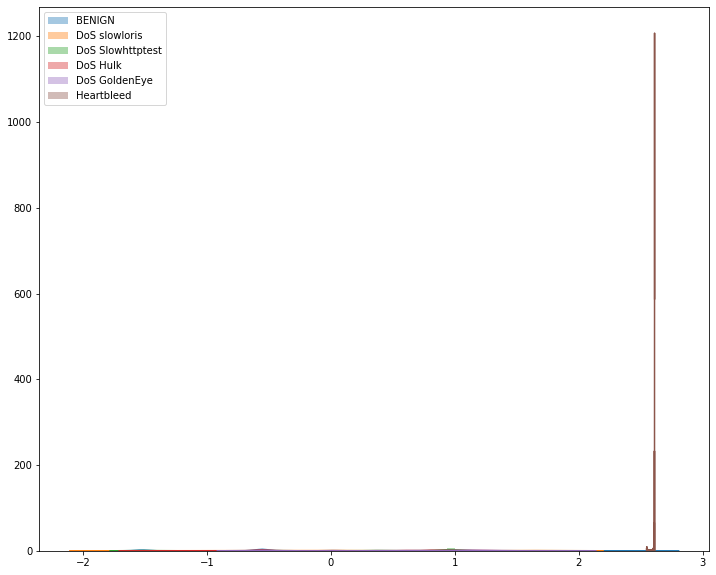

In [65]:
fig=plt.figure()
for label in df['Label'].unique():
    sns.distplot(df_per_class[label]['Total Fwd Packets'].values,hist=True,kde=True)
    plt.legend(df_per_class.keys())

We then save the distribution plots in their own folder for future references.

In [ ]:
for index, feature in enumerate(df.columns.values[0:-1],1):
    fig=plt.figure()
    for label in df['Label'].unique():
        sns.distplot(df_per_class[label][feature],bins=10)
    plt.title(feature+' distribution across class labels')
    plt.legend(df_per_class.keys())
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()
    plt.savefig('./figures/'+day_of_week+'/per_class_features/'+str(index)+'_'+feature+'_Histogram.png')
    plt.close(fig)